In [16]:
#! pip3 install SimpSOM

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep = ';')
df.loc[(df['all_Response']>= 1),'all_Response'] = 1
df

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2,4,58138.0,0,58,7.0,0.0,1.0,64.0,3314,1617.000000,25.0
1,2,4,46344.0,1,38,5.0,0.0,0.0,67.0,2764,27.000000,6.0
2,2,5,71613.0,0,26,4.0,0.0,0.0,56.0,2963,776.000000,21.0
3,2,5,26646.0,1,26,6.0,0.0,0.0,37.0,2790,53.000000,8.0
4,4,3,58293.0,1,94,5.0,0.0,0.0,40.0,2812,422.000000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,5.0,0.0,0.0,54.0,3032,1294.524192,18.0
2236,4,5,64014.0,2,56,7.0,0.0,1.0,75.0,2670,444.000000,22.0
2237,2,2,56981.0,0,91,6.0,0.0,1.0,40.0,2806,1241.000000,19.0
2238,3,5,69245.0,0,8,3.0,0.0,0.0,65.0,2807,843.000000,23.0


In [19]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [20]:
# Encoding categorical data
df = encoding_char(df)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [23]:
# Less features
X = df[:, [2, 3, 5, 7, 10,11]]
 #'Income','Kidhome','NumWebVisitsMonth','all_Response','MNT','all_Purchases'

In [60]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(16, 14, X, PBC=True) #размерность желательно брать раз в 10 меньше, чем кол-во наблюдений (15*15) 10*10 также отработало хорошо
net.train(0.01, 20000)  #(скорость, кол-во итераций)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


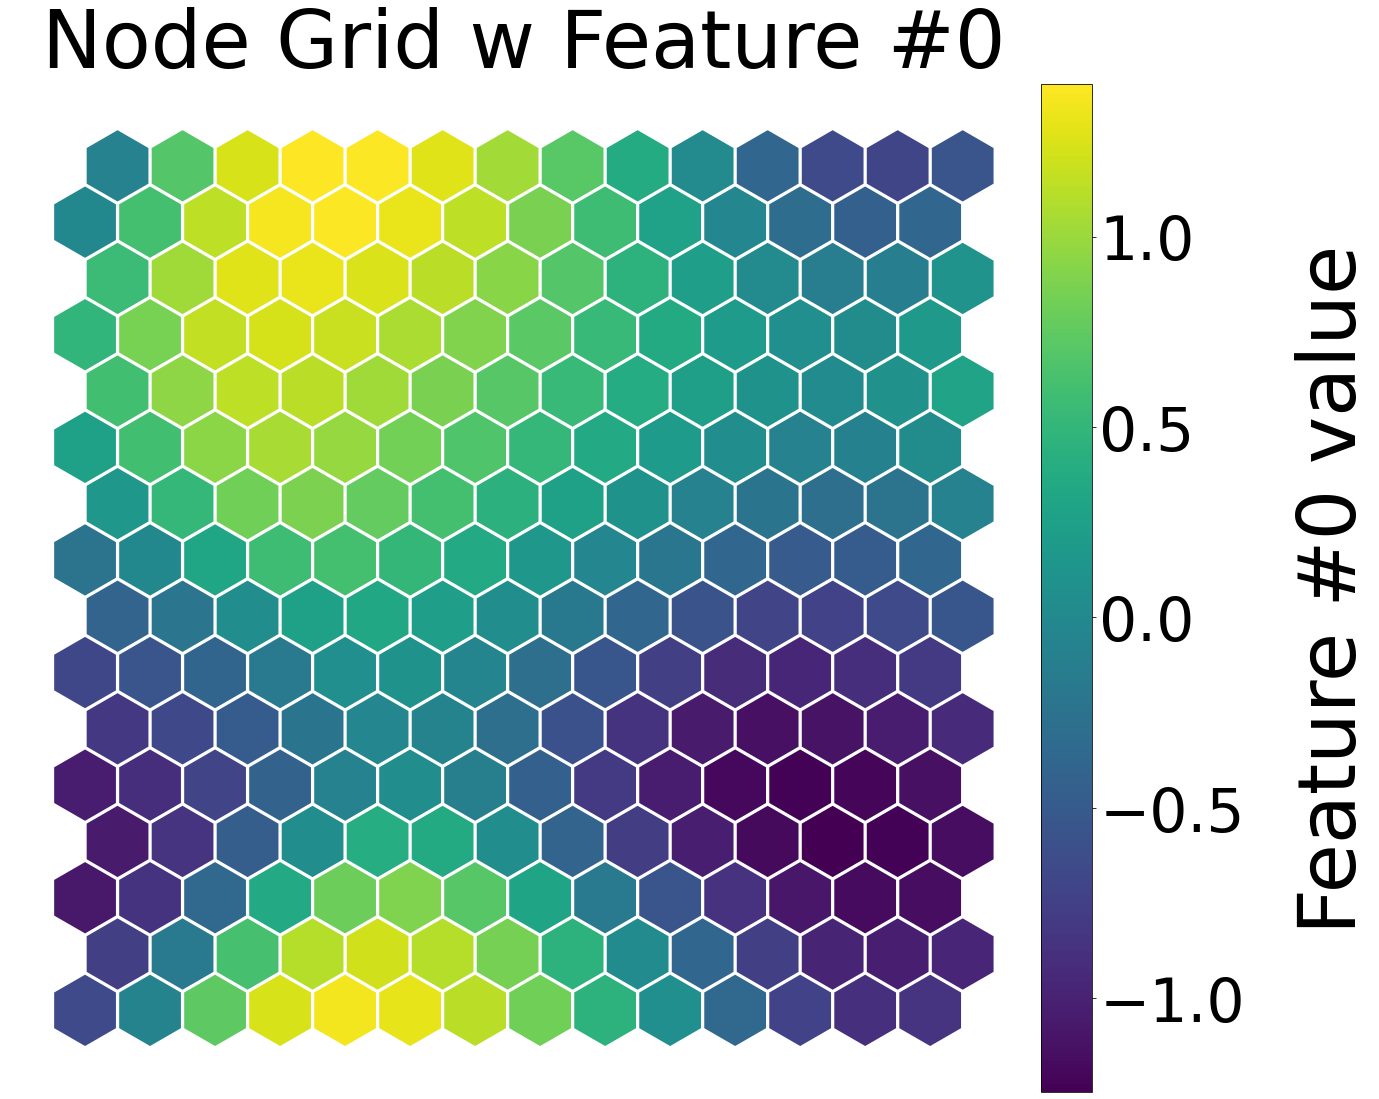

In [61]:
net.nodes_graph(colnum=0)

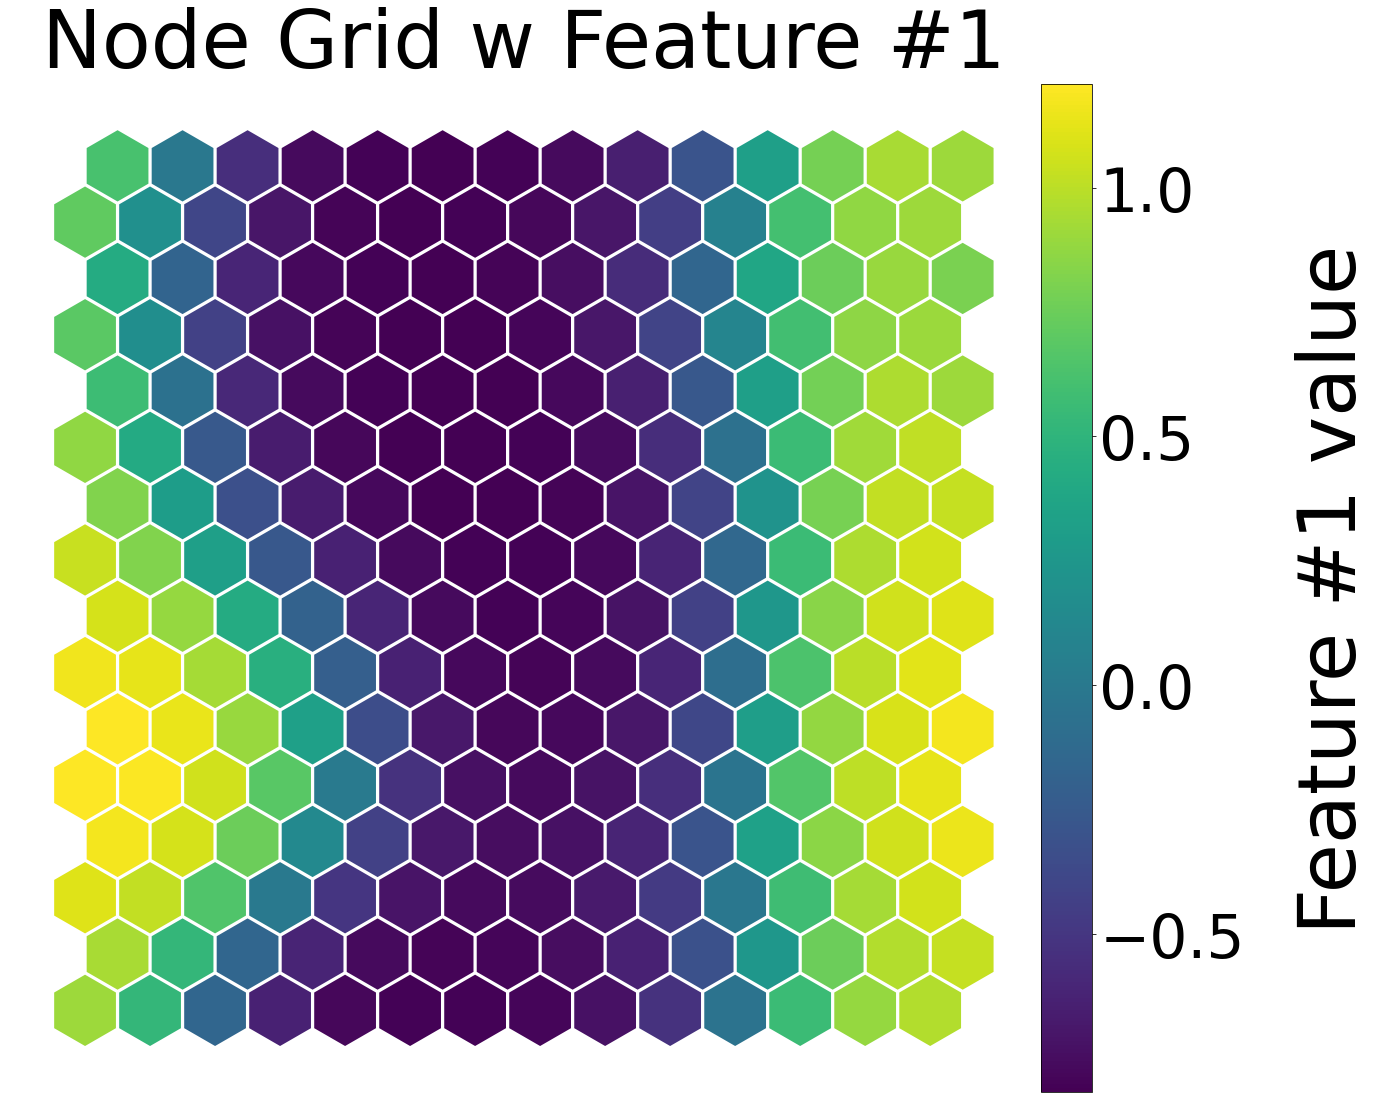

In [62]:
net.nodes_graph(colnum=1)

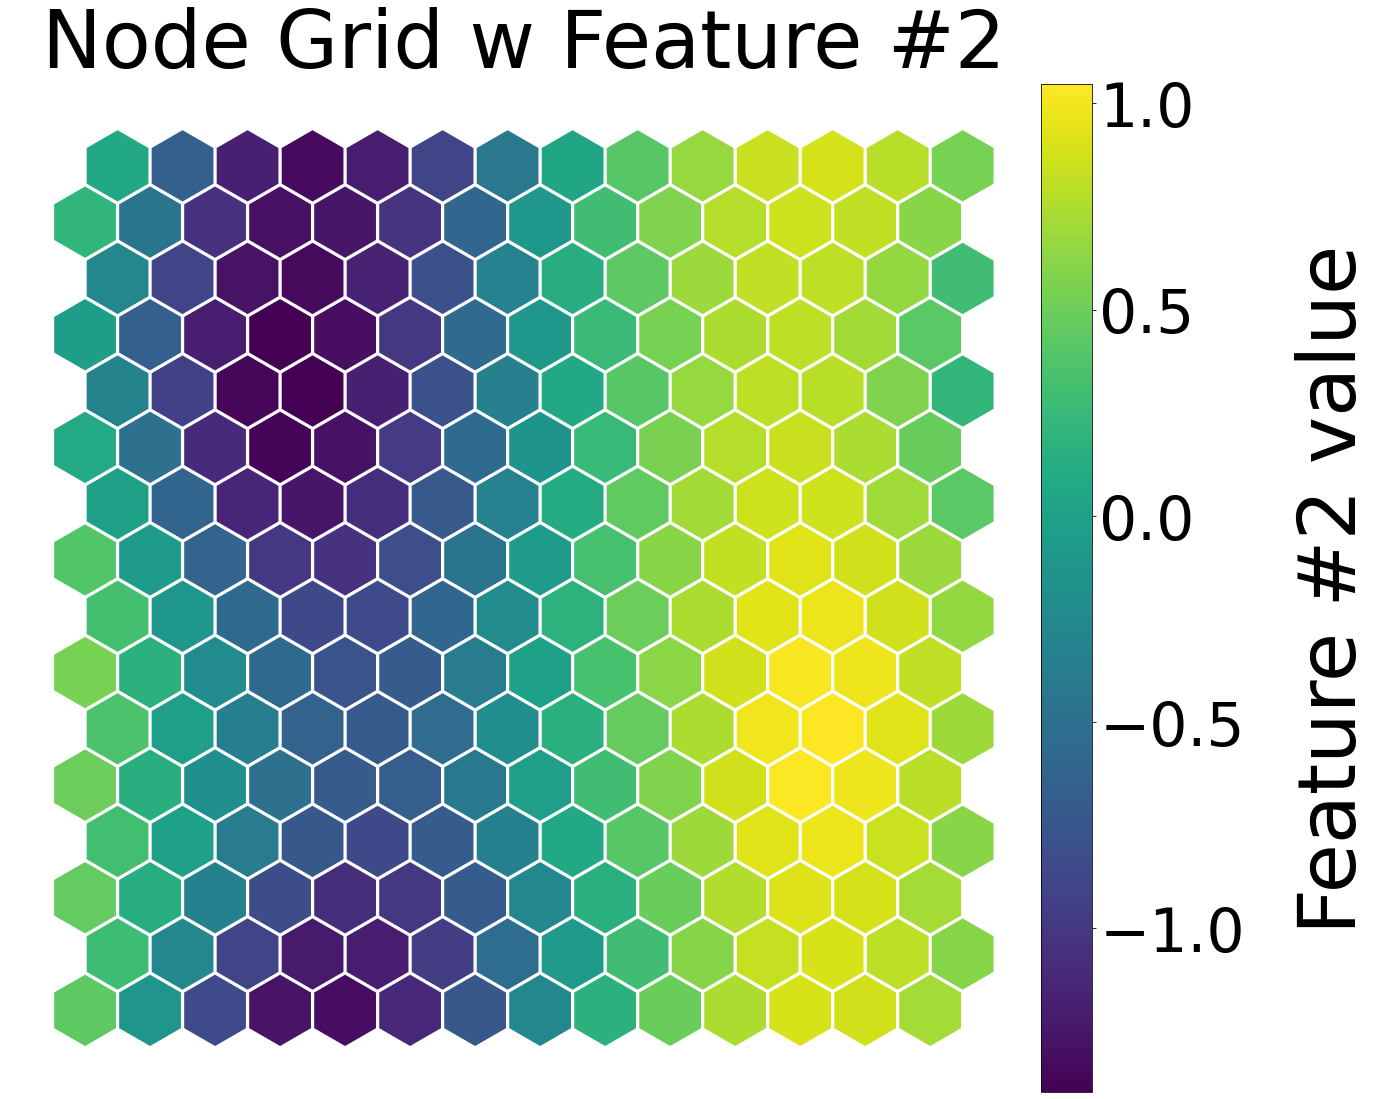

In [63]:
net.nodes_graph(colnum=2)

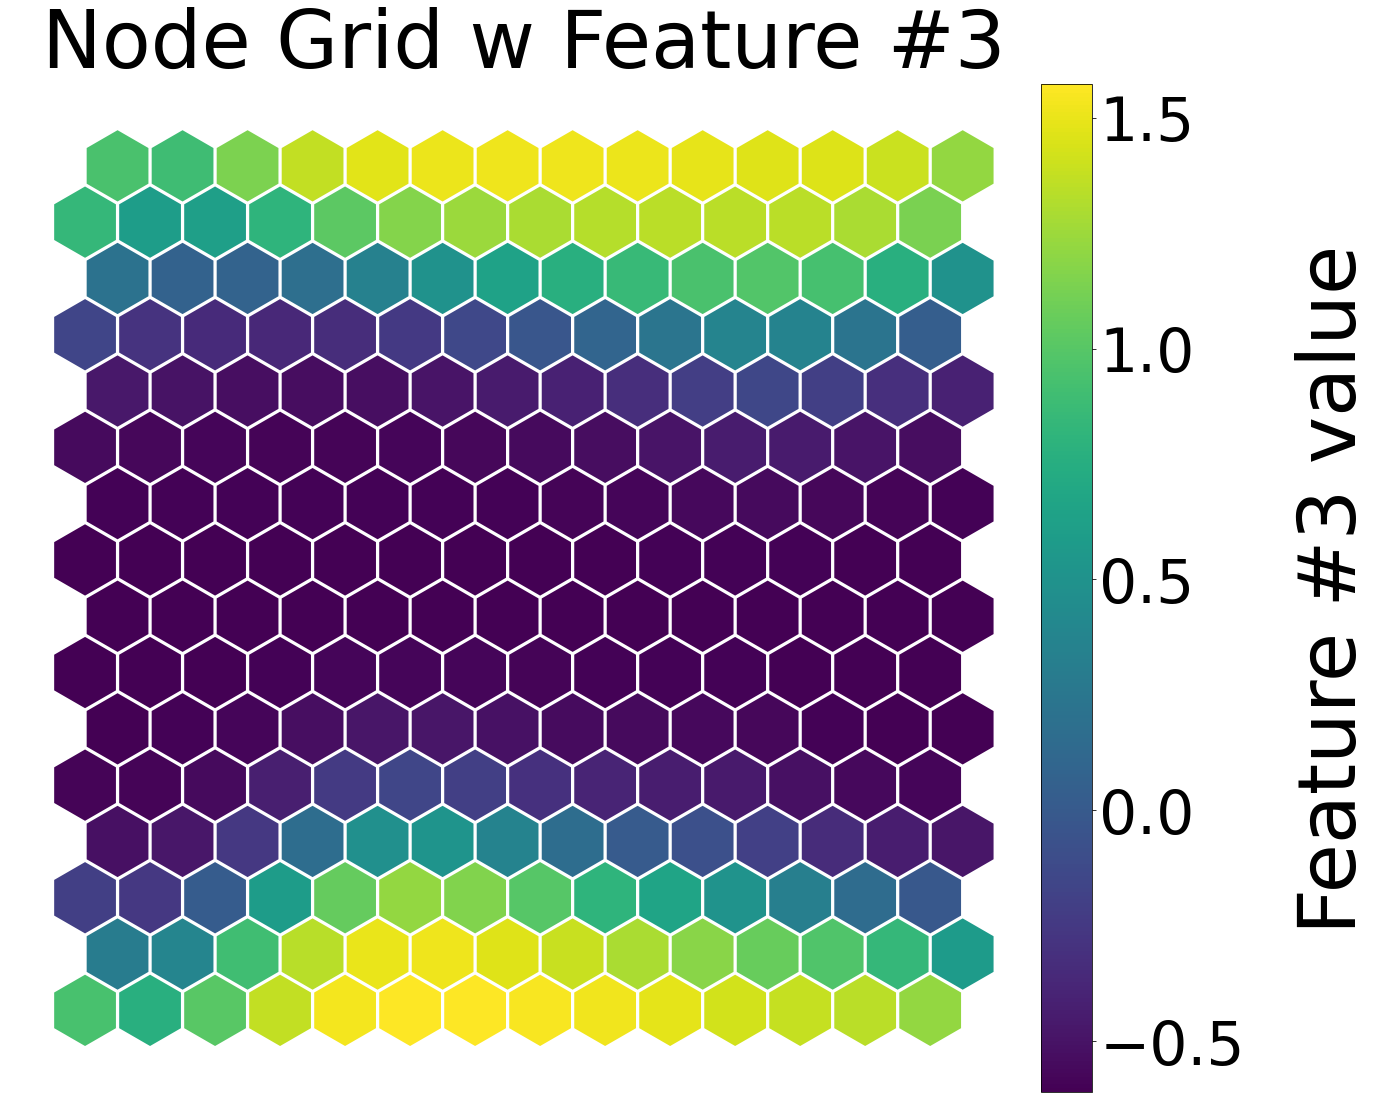

In [64]:
net.nodes_graph(colnum=3)

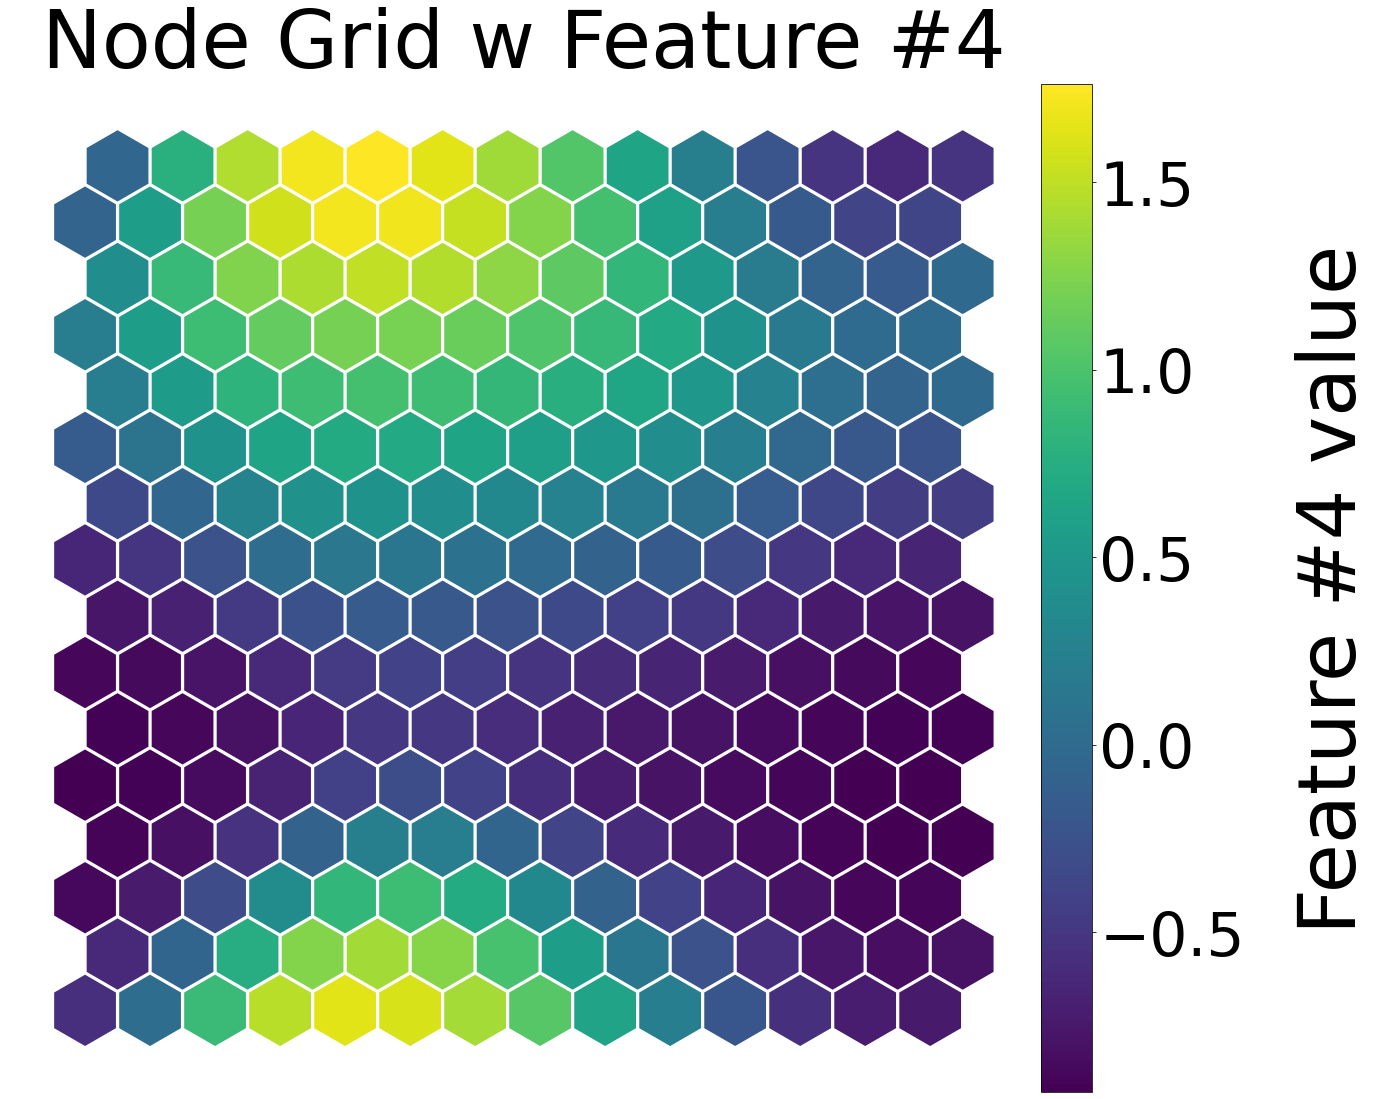

In [65]:
net.nodes_graph(colnum=4)

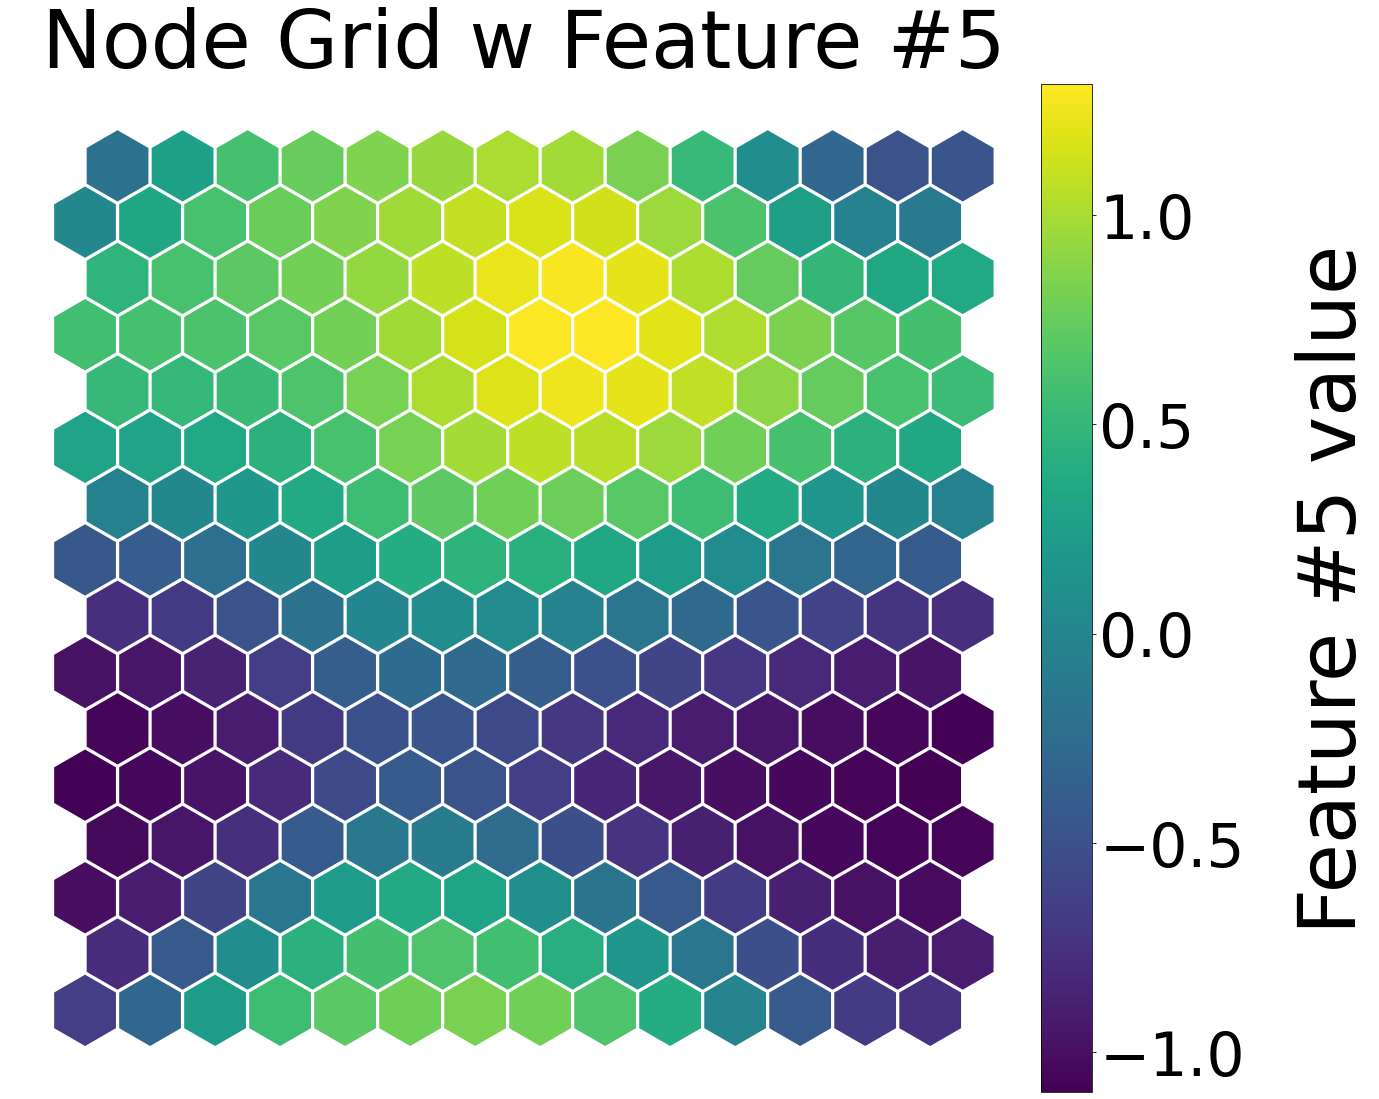

In [66]:
net.nodes_graph(colnum=5)

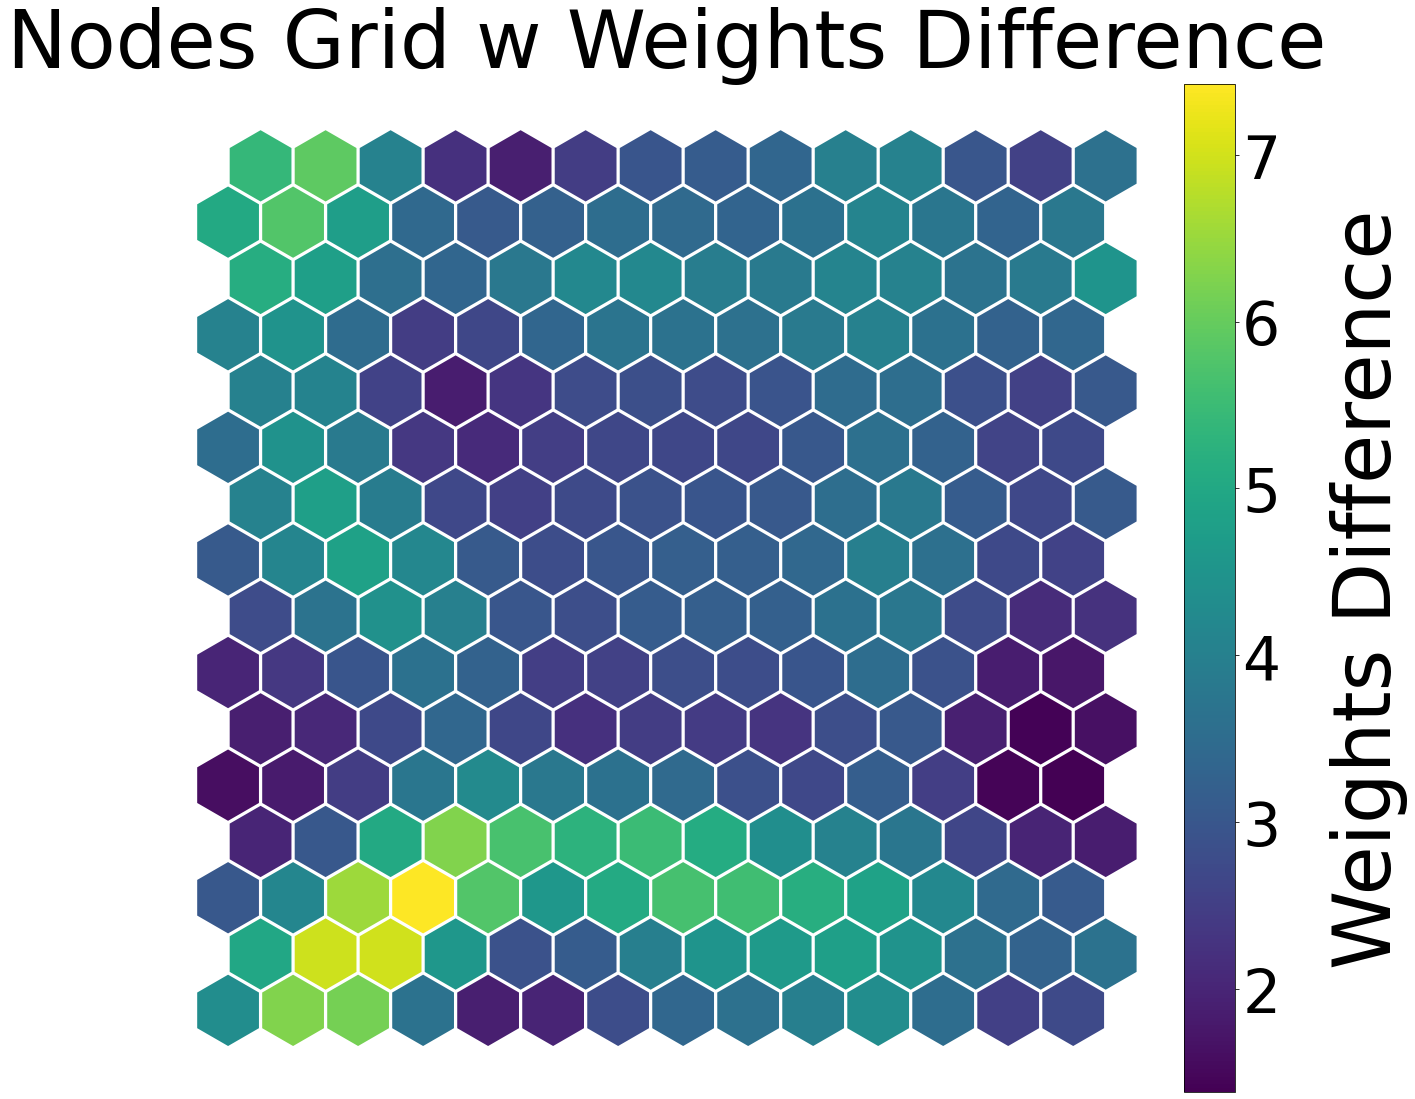

In [67]:
net.diff_graph()

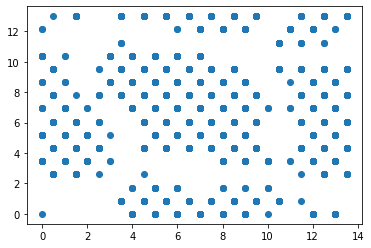

In [68]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Можно предполагать, что данный метод также предлагает 3 класстера. Однако если бы данных было больше, то можно было бы предпологать, что кол-во кластеров можно делать 6 (лишь догадка)

In [81]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

## Сравнение с другими моделями

In [82]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [83]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.23635468345206706

# Пометка. одинакое шкалирование везде сделать. и потом отшкалировать обратно. и написать выводы!